<a href="https://colab.research.google.com/github/carlosarturo86/Coder_DataScienceII/blob/main/DSII_Proyecto_Entrega_Inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada

**Data Science II**

Carlos Arturo Rodríguez A

Entrega Preliminar

**CODERHOUSE**

# Carga de los Datos

Se importa de github 4 archivos, dado que el tamaño total del csv era de 75 MB.

Datos obtenidos de Kaggle del dataset llamado *Fitness Tracker Dataset*

In [241]:
import pandas as pd

df1 = pd.read_csv('https://raw.githubusercontent.com/carlosarturo86/Coder_DataScienceII/refs/heads/main/fitness_tracker_dataset_A.csv',sep=';',low_memory=False)
df2 = pd.read_csv('https://raw.githubusercontent.com/carlosarturo86/Coder_DataScienceII/refs/heads/main/fitness_tracker_dataset_B.csv',sep=';',low_memory=False)
df3 = pd.read_csv('https://raw.githubusercontent.com/carlosarturo86/Coder_DataScienceII/refs/heads/main/fitness_tracker_dataset_C.csv',sep=';',low_memory=False,index_col=False)
df4 = pd.read_csv('https://raw.githubusercontent.com/carlosarturo86/Coder_DataScienceII/refs/heads/main/fitness_tracker_dataset_D.csv',sep=';',low_memory=False,index_col=False)

#Hay que concatenar los 4 archivos para formar un único archivo csv
df=pd.concat([df1,df2,df3,df4],ignore_index=True)
df=df.drop_duplicates()
df.head()


user_id       date    steps  calories_burned  distance_km  active_minutes  \
0    468.0  1/01/2023   4530.0          2543.02        16.10           613.0   
1    879.0  1/01/2023  11613.0          1720.76         8.10           352.0   
2    152.0  1/01/2023  27335.0          1706.35         3.57           236.0   
3    311.0  1/01/2023  13459.0          2912.38         6.41          1329.0   
4    759.0  1/01/2023  15378.0          3344.51        17.88            52.0   

   sleep_hours  heart_rate_avg workout_type weather_conditions location  \
0          1.5           176.0      Walking              Clear     Park   
1          6.3           128.0      Cycling                Fog     Park   
2          6.7           134.0         Yoga               Snow     Park   
3         11.6           116.0     Swimming               Rain   Office   
4          7.4            84.0     Swimming               Rain   Office   

      mood  
0    Tired  
1    Happy  
2  Neutral  
3    Tired  
4  Neutral

In [242]:
df.shape

(1000001, 12)

## Atributos

*    user_id: Unique ID for each user.

*    date: Record date.

*    steps: Total steps taken on that day.

*    calories_burned: Estimated calories burned.

*    distance_km: Distance covered (in kilometers).

*    active_minutes: Time spent in active movement.

*    sleep_hours: Total hours of sleep.

*    heart_rate_avg: Average heart rate for the day.

*    workout_type: Type of workout (e.g. running, cycling, yoga).

*    weather_conditions: Weather that day (e.g. sunny, rainy).

*    location: General location (e.g. city name or region).

*    mood: User's reported mood (e.g. happy, tired, stressed).




# Análisis Exploratorio de Datos - EDA -

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000001 entries, 0 to 2730692
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  float64
 1   date                1000000 non-null  object 
 2   steps               1000000 non-null  float64
 3   calories_burned     1000000 non-null  float64
 4   distance_km         1000000 non-null  float64
 5   active_minutes      1000000 non-null  float64
 6   sleep_hours         1000000 non-null  float64
 7   heart_rate_avg      1000000 non-null  float64
 8   workout_type        856880 non-null   object 
 9   weather_conditions  1000000 non-null  object 
 10  location            1000000 non-null  object 
 11  mood                1000000 non-null  object 
dtypes: float64(7), object(5)
memory usage: 99.2+ MB


*   El total de instancias son de 1.000.0000.
*   Se tienen 7 atributos númericos y 5 categóricos.
*   Se tienen 856.880 de datos no nulos en el atributo workout_type, faltan 143.120 para completar el total de datos. Hay que indagar que sucede con esos valores faltantes.

In [244]:
df.describe() #Descripción valores númericos

user_id           steps  calories_burned     distance_km  \
count  1000000.000000  1000000.000000   1000000.000000  1000000.000000   
mean       499.550302    15005.767061      2750.008148        9.994465   
std        288.166608     8659.195341       721.473950        5.774298   
min          1.000000        0.000000      1500.000000        0.000000   
25%        250.000000     7492.000000      2125.517500        4.990000   
50%        499.000000    15020.000000      2748.310000        9.990000   
75%        749.000000    22507.000000      3375.190000       14.990000   
max        999.000000    29999.000000      4000.000000       20.000000   

       active_minutes     sleep_hours  heart_rate_avg  
count  1000000.000000  1000000.000000  1000000.000000  
mean       719.418241        6.000228      119.458316  
std        415.894771        3.463977       34.654034  
min          0.000000        0.000000       60.000000  
25%        359.000000        3.000000       89.000000  
50%        719.000000        6.000000      119.000000  
75%       1080.000000        9.000000      149.000000  
max       1439.000000       12.000000      179.000000

*   Un minimo de sleep_hours en "0" es extraño, debería ser otro número por lo menos mayor a 0. Hay que ver qué pasa en esos casos cuando sleep_hours =0.

*   ¿Qué ocurre cuando steps=0? ¿Qué valores aparecen en esa o en esas filas para los otros atributos?. Parece que para este valor en 0 la persona puede estar en un estado de reposo, sin embargo se observa un valor de calories_burned de 1500 y un heart_rate_avg de 60, relativamente bajo, comparado con el resto de valores teniendo en cuenta que se trata de un dataset de métricas de personas realizando una actividad fisica.


*   Según la concentración del 75% de los datos, un gran número de personas recorre una distancia cercana a la máxima que es 20 km, quemando un número alto de calorias dedicando un total de 1080 minutos y un número de pasos de 22507. Los anteriores son datos próximos a los valores máximos en cada categória, no hay una gran diferencia entre el max y 75% para estas columnas.

In [245]:
df.describe(include='object') #Descripción valores categóricos

date workout_type weather_conditions location     mood
count      1000000       856880            1000000  1000000  1000000
unique        1000            6                  4        5        4
top     26/09/2025      Cycling                Fog     Home    Happy
freq          1000       143115             250417   200543   250654

## Valores nulos

In [246]:
df.isnull().sum()

user_id                    1
date                       1
steps                      1
calories_burned            1
distance_km                1
active_minutes             1
sleep_hours                1
heart_rate_avg             1
workout_type          143121
weather_conditions         1
location                   1
mood                       1
dtype: int64

In [247]:
((df.isnull().sum())/(len(df)))*100

user_id                0.000100
date                   0.000100
steps                  0.000100
calories_burned        0.000100
distance_km            0.000100
active_minutes         0.000100
sleep_hours            0.000100
heart_rate_avg         0.000100
workout_type          14.312086
weather_conditions     0.000100
location               0.000100
mood                   0.000100
dtype: float64

### workout_type

*   Todas las columnas tiene por lo menos un valor nulo que representa un 0.001% del total de las instancias, a excepción del atributo workout_type que tiene 143.121 que representa 14.31% del total de sus valores.

In [248]:
df['workout_type'].value_counts(dropna=False)

workout_type
NaN            143121
Cycling        143115
Gym Workout    143108
Running        142774
Walking        142668
Swimming       142627
Yoga           142588
Name: count, dtype: int64

*   Usando el parámetro dropna=False podemos contar también cuantas veces se repiten los valores nulos, para este caso hay 143.121 instancias nulas para este atributo, como se había mencionado anteriormente.

In [249]:
df[df['workout_type'].isnull()]

user_id        date    steps  calories_burned  distance_km  \
12         555.0   1/01/2023  14834.0          3293.93        19.12   
15         869.0   1/01/2023   4641.0          2436.38         8.25   
24         159.0   1/01/2023   9712.0          2985.72        11.31   
40         543.0   1/01/2023  10155.0          2505.42         1.52   
45         177.0   1/01/2023  16949.0          3187.79         3.38   
...          ...         ...      ...              ...          ...   
2730657    546.0  26/09/2025  29041.0          2005.17        16.24   
2730671    545.0  26/09/2025   3934.0          2065.44        19.59   
2730678     34.0  26/09/2025   3030.0          2682.20        15.07   
2730680    776.0  26/09/2025  12596.0          2695.56         2.78   
2730682    642.0  26/09/2025  13580.0          2275.52        12.14   

         active_minutes  sleep_hours  heart_rate_avg workout_type  \
12                323.0         11.0           116.0          NaN   
15                595.0          1.5            90.0          NaN   
24               1060.0         10.0            69.0          NaN   
40                238.0          3.2           178.0          NaN   
45                505.0          8.8            80.0          NaN   
...                 ...          ...             ...          ...   
2730657          1298.0          9.4           141.0          NaN   
2730671           247.0          5.9           104.0          NaN   
2730678            76.0          1.7           169.0          NaN   
2730680           941.0          8.6            77.0          NaN   
2730682            78.0          9.2           122.0          NaN   

        weather_conditions location      mood  
12                    Snow     Home   Neutral  
15                    Snow    Other     Tired  
24                    Snow     Park   Neutral  
40                   Clear     Home     Happy  
45                   Clear     Park  Stressed  
...                    ...      ...       ...  
2730657               Snow   Office     Tired  
2730671               Rain     Home     Tired  
2730678              Clear     Home  Stressed  
2730680              Clear     Park     Tired  
2730682              Clear   Office  Stressed  

[143121 rows x 12 columns]

###  Calories_burned

In [250]:
df[df['calories_burned'].isnull()]

user_id date  steps  calories_burned  distance_km  active_minutes  \
199999      NaN  NaN    NaN              NaN          NaN             NaN   

        sleep_hours  heart_rate_avg workout_type weather_conditions location  \
199999          NaN             NaN          NaN                NaN      NaN   

       mood  
199999  NaN

El resultado de valores nulos de **calories_burned** muestra la instancia que tiene todos los atributos el **valor nulos (NAN)**.La fila completa con valores NAN, 199999, se elimina como se muestra a seguir.

In [251]:
df =df.dropna(subset=['calories_burned'])
df[df['calories_burned'].isnull()]

Empty DataFrame
Columns: [user_id, date, steps, calories_burned, distance_km, active_minutes, sleep_hours, heart_rate_avg, workout_type, weather_conditions, location, mood]
Index: []

Al no tener valores NAN sobre el atributo calories_burned pasamos a gráficar y calcular los valores del boxplot.

***Boxplot de Calories Burned***

In [252]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio # Para mostrar el gráfico en diferentes entornos (opcional)

# 2. Generar el Boxplot Interactivo con Plotly Express
fig = px.box(
    df,                             # DataFrame
    y='calories_burned',                    # Columna a graficar en el eje Y
    title="Boxplot Interactivo de Calories Quemadas (Calories_burned)",
    notched=False,                  # Mostrar muescas de confianza (opcional)
    orientation='v',                # Orientación vertical ('v')
    points="outliers",              # Muestra solo los puntos clasificados como outliers
    hover_data=['calories_burned']          # Información adicional que se muestra al pasar el mouse (opcional)
)

# Opcional: Personalización para mejorar la estética
fig.update_traces(
    boxmean=True, # Mostrar la media como una línea discontinua
    boxpoints='suspectedoutliers' # Puedes elegir 'all', 'outliers' o 'suspectedoutliers'
)

# Muestra el gráfico
fig.show()

###Reemplazo de NAN en Workout_type

Se consideró no eliminar las instancias donde aparecen los valores NAN, serán reemplazados por el valor de "value not supplied".

In [253]:
df["workout_type"] = df["workout_type"].fillna('value not supplied')
df["workout_type"].value_counts()


workout_type
value not supplied    143120
Cycling               143115
Gym Workout           143108
Running               142774
Walking               142668
Swimming              142627
Yoga                  142588
Name: count, dtype: int64

##Histogramas de las vbles Categóricas

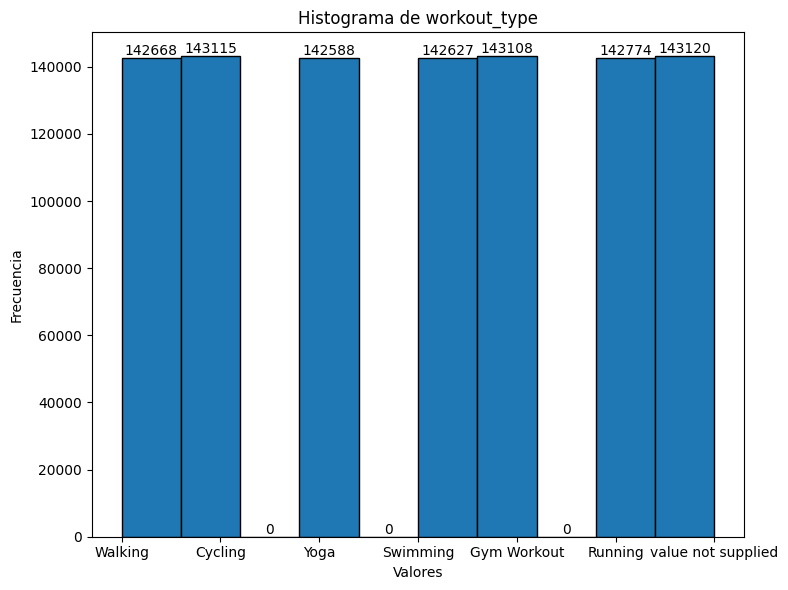

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura
fig, ax = plt.subplots(figsize=(8, 6))

# Dibujar el histograma
counts, bins, patches = ax.hist(df['workout_type'], bins=10, edgecolor='black')

# Agregar el valor en cada barra
for count, patch in zip(counts, patches):
    ax.text(patch.get_x() + patch.get_width() / 2,
            patch.get_height(),
            f'{int(count)}',
            ha='center',
            va='bottom')

# Ajustar los títulos y etiquetas
ax.set_title('Histograma de workout_type')
ax.set_xlabel('Valores')
ax.set_ylabel('Frecuencia')

# Mostrar la figura
plt.tight_layout()
plt.show()

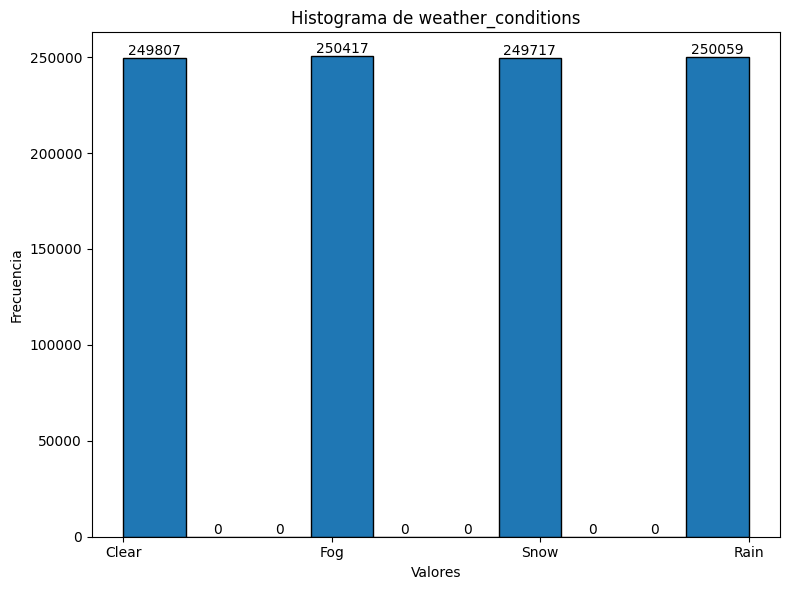

In [255]:
# Crear una figura
fig, ax = plt.subplots(figsize=(8, 6))

# Dibujar el histograma
counts, bins, patches = ax.hist(df['weather_conditions'], bins=10, edgecolor='black')

# Agregar el valor en cada barra
for count, patch in zip(counts, patches):
    ax.text(patch.get_x() + patch.get_width() / 2,
            patch.get_height(),
            f'{int(count)}',
            ha='center',
            va='bottom')

# Ajustar los títulos y etiquetas
ax.set_title('Histograma de weather_conditions')
ax.set_xlabel('Valores')
ax.set_ylabel('Frecuencia')

# Mostrar la figura
plt.tight_layout()
plt.show()

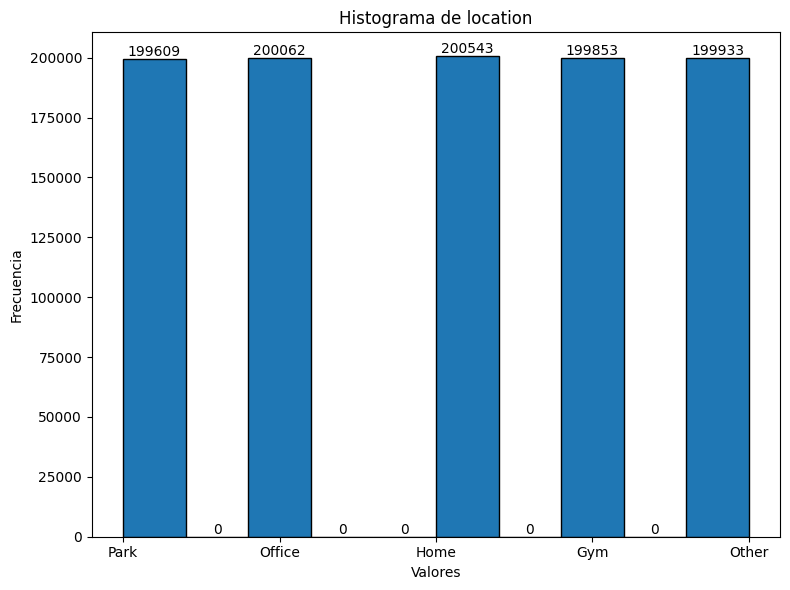

In [256]:
# Crear una figura
fig, ax = plt.subplots(figsize=(8, 6))

# Dibujar el histograma
counts, bins, patches = ax.hist(df['location'], bins=10, edgecolor='black')

# Agregar el valor en cada barra
for count, patch in zip(counts, patches):
    ax.text(patch.get_x() + patch.get_width() / 2,
            patch.get_height(),
            f'{int(count)}',
            ha='center',
            va='bottom')

# Ajustar los títulos y etiquetas
ax.set_title('Histograma de location')
ax.set_xlabel('Valores')
ax.set_ylabel('Frecuencia')

# Mostrar la figura
plt.tight_layout()
plt.show()

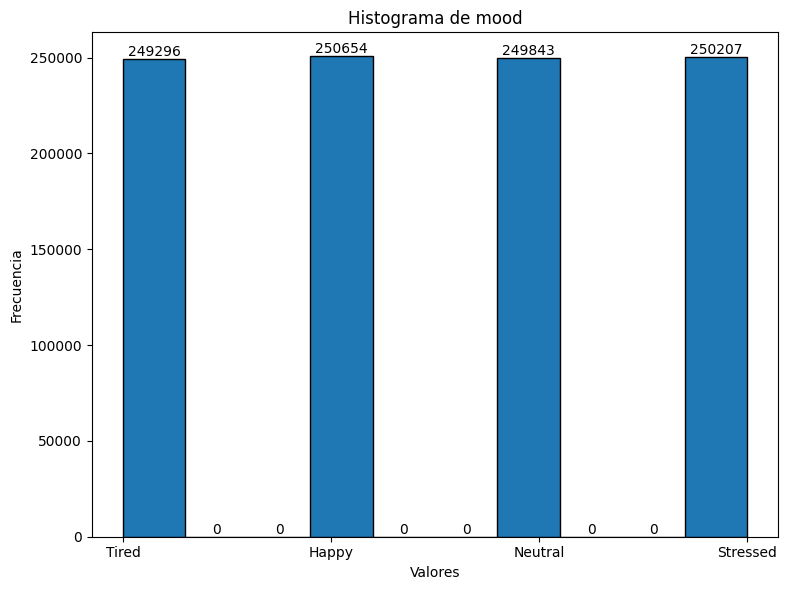

In [257]:

# Crear una figura
fig, ax = plt.subplots(figsize=(8, 6))

# Dibujar el histograma
counts, bins, patches = ax.hist(df['mood'], bins=10, edgecolor='black')

# Agregar el valor en cada barra
for count, patch in zip(counts, patches):
    ax.text(patch.get_x() + patch.get_width() / 2,
            patch.get_height(),
            f'{int(count)}',
            ha='center',
            va='bottom')

# Ajustar los títulos y etiquetas
ax.set_title('Histograma de mood')
ax.set_xlabel('Valores')
ax.set_ylabel('Frecuencia')

# Mostrar la figura
plt.tight_layout()
plt.show()

## Steps y kilometers vs Calories Burned

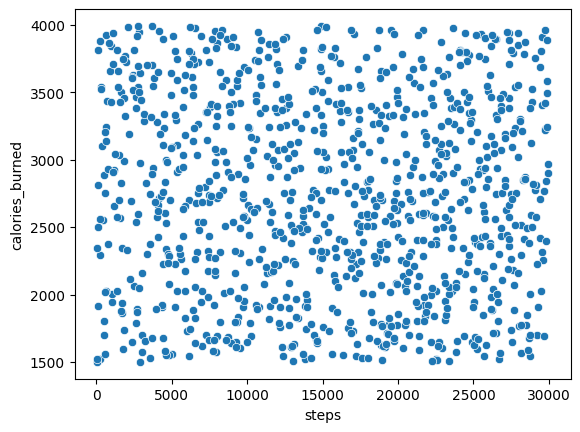

In [258]:
sample_df = df.sample(frac=0.001, random_state=42)
sns.scatterplot(x='steps', y='calories_burned',data =sample_df)
plt.show()

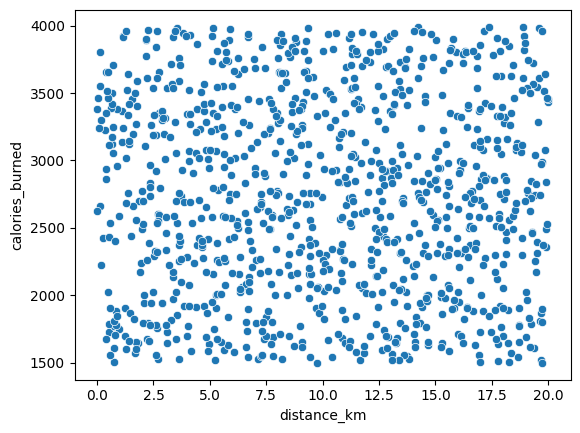

In [259]:
sns.scatterplot(x='distance_km', y='calories_burned', data=sample_df)
plt.show()

En los anteriores gráficos no hay una correlación lineal entre calories_burned y las variables distance y steps

## Sleep = 0

In [260]:
zero_sleep = df[df['sleep_hours'] == 0]
print("Casos con 0 h de sueño:", len(zero_sleep))

Casos con 0 h de sueño: 4040


In [261]:
zero_sleep.describe()

user_id         steps  calories_burned  distance_km  \
count  4040.000000   4040.000000      4040.000000  4040.000000   
mean    497.697030  14458.336881      2750.523012     9.977304   
std     284.871947   8647.933671       714.949675     5.801882   
min       1.000000     15.000000      1500.090000     0.000000   
25%     247.000000   6892.750000      2139.497500     4.950000   
50%     498.000000  14352.000000      2749.870000    10.080000   
75%     740.000000  21693.750000      3371.267500    14.922500   
max     999.000000  29992.000000      3999.660000    20.000000   

       active_minutes  sleep_hours  heart_rate_avg  
count     4040.000000       4040.0     4040.000000  
mean       723.063861          0.0      120.132673  
std        417.182412          0.0       34.621044  
min          2.000000          0.0       60.000000  
25%        362.000000          0.0       90.000000  
50%        719.000000          0.0      121.000000  
75%       1084.000000          0.0      150.000000  
max       1439.000000          0.0      179.000000

**Qué ejericicios hicieron los que "No duermen"?**

In [262]:
print(zero_sleep['workout_type'].value_counts())

workout_type
value not supplied    617
Gym Workout           593
Cycling               587
Walking               573
Running               572
Yoga                  550
Swimming              548
Name: count, dtype: int64


**Donde entrenaron aquellos que "No duermen"?**

In [263]:
print(zero_sleep['location'].value_counts())

location
Office    863
Home      819
Gym       791
Park      791
Other     776
Name: count, dtype: int64


Cómo se sintieron aquellos que "No duermen" al realizar actividad fisica?

In [264]:
print(zero_sleep['mood'].value_counts())

mood
Happy       1035
Stressed    1008
Neutral     1002
Tired        995
Name: count, dtype: int64


**Horas de sueño y distancia en ceros**

In [265]:
df[(df['sleep_hours'] == 0) & (df['distance_km'] == 0)]

user_id       date    steps  calories_burned  distance_km  \
4687       522.0  5/01/2023  13925.0          3660.10          0.0   
2401295    122.0  1/11/2024  29523.0          3251.81          0.0   

         active_minutes  sleep_hours  heart_rate_avg workout_type  \
4687             1270.0          0.0           126.0     Swimming   
2401295          1018.0          0.0           165.0      Walking   

        weather_conditions location     mood  
4687                 Clear   Office  Neutral  
2401295               Rain     Park  Neutral

## Steps = 0

In [266]:
zero_steps = df[df['steps'] == 0]
print('Casos con Steps = 0 son',len(zero_steps))

Casos con Steps = 0 son 24


In [267]:
zero_steps.describe()

user_id  steps  calories_burned  distance_km  active_minutes  \
count   24.000000   24.0        24.000000    24.000000       24.000000   
mean   507.291667    0.0      2737.705833     8.215833      768.750000   
std    290.266666    0.0       808.505369     5.547687      379.322537   
min     83.000000    0.0      1564.900000     0.790000       25.000000   
25%    234.250000    0.0      2107.420000     3.215000      563.000000   
50%    526.000000    0.0      2568.735000     7.515000      782.000000   
75%    788.500000    0.0      3543.912500    13.047500     1015.250000   
max    984.000000    0.0      3894.780000    18.110000     1350.000000   

       sleep_hours  heart_rate_avg  
count    24.000000       24.000000  
mean      5.587500      126.250000  
std       3.395305       32.624677  
min       0.400000       66.000000  
25%       2.675000      101.500000  
50%       5.550000      135.000000  
75%       7.900000      149.000000  
max      11.500000      175.000000

**Cero pasos por el tipo de actividad física**

In [268]:
print(zero_steps['workout_type'].value_counts())

workout_type
Running               5
Cycling               4
Swimming              4
Gym Workout           4
value not supplied    3
Walking               3
Yoga                  1
Name: count, dtype: int64


Aparece en 3 ocasiones caminar y 5 correr, del resto no involucra caminar.

**No realizaron pasos y con 1 o menos horas de dormir?**

In [269]:
df[(df['sleep_hours'] <= 1) & (df['steps'] == 0)]

user_id        date  steps  calories_burned  distance_km  \
1088381    880.0  16/10/2023    0.0          2301.21         7.80   
1905254    847.0  28/05/2024    0.0          3796.54        12.28   
2621505    216.0   9/06/2025    0.0          3191.80        15.70   
2652682    365.0  10/07/2025    0.0          3492.32        15.75   

         active_minutes  sleep_hours  heart_rate_avg workout_type  \
1088381          1297.0          0.9           143.0      Cycling   
1905254           725.0          0.4           175.0      Cycling   
2621505           661.0          0.5           140.0      Running   
2652682           394.0          1.0           149.0     Swimming   

        weather_conditions location      mood  
1088381                Fog     Home     Happy  
1905254              Clear     Home     Tired  
2621505               Snow   Office  Stressed  
2652682               Snow     Home     Happy

La respuesta tiene sentido dado que el workout_type no involucra caminar, Cycling, Running y Swimming.

## Valores Duplicados

In [270]:
valores_duplicados = df.duplicated()
valores_duplicados.sum()
df[valores_duplicados]

Empty DataFrame
Columns: [user_id, date, steps, calories_burned, distance_km, active_minutes, sleep_hours, heart_rate_avg, workout_type, weather_conditions, location, mood]
Index: []

No se encontraron valores duplicados en el df.

## Algunas hipótesis

**Más pasos = Más Calorías**

In [271]:
corr = df['steps'].corr(df['calories_burned'])
print(f"Correlación pasos-calorías: {corr:.2f}")

Correlación pasos-calorías: 0.00


No hay una relación directa, solo los pasos no es suficiente para la quema de calorías.

**Correr que más que caminar?**

In [272]:
prom = df.groupby('workout_type')['calories_burned'].mean().sort_values(ascending=False)
print(prom[['Running', 'Walking']])

workout_type
Running    2750.638802
Walking    2751.356435
Name: calories_burned, dtype: float64


Según la data, no hay una diferencia significativa entre estas 2 actividades con respecto a la quema de calorías.

In [273]:
#Dormir poco reduce calorias?
#df['sleep_cat'] = pd.cut(df['sleep_hours'], bins=[0,5,8,12], labels=['≤5 h','6-8 h','>8 h'])
#print(df.groupby('sleep_cat')['calories_burned'].mean())

Parece que dormir X número de horas no hace mucha diferencia o el impacto parece no ser tan significativo con respecto a la quema de calorías para cada intervalo de horas.

**Hacer deporte bajo la nieve aumenta las calorías?**

In [274]:
print(df.groupby('weather_conditions')['calories_burned'].mean())

weather_conditions
Clear    2750.945882
Fog      2749.869152
Rain     2751.391368
Snow     2747.824347
Name: calories_burned, dtype: float64


hacer deporte bajo nieve es el último en la categoría, hay una diferencia, no muy significativa de casi 4kcal con un clima despejado.

**Gimnasio quema más en casa?**

In [275]:
print(df.groupby('location')['calories_burned'].mean().sort_values(ascending=False))

location
Office    2751.988067
Gym       2750.624207
Park      2750.021841
Home      2748.944939
Other     2748.463921
Name: calories_burned, dtype: float64


No hay una diferencia significativa entre el lugar donde se realice la actividad para la quema de calorias.

# Correlaciones entre los datos

## Correlación de variables numéricas

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 2730692
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  float64
 1   date                1000000 non-null  object 
 2   steps               1000000 non-null  float64
 3   calories_burned     1000000 non-null  float64
 4   distance_km         1000000 non-null  float64
 5   active_minutes      1000000 non-null  float64
 6   sleep_hours         1000000 non-null  float64
 7   heart_rate_avg      1000000 non-null  float64
 8   workout_type        1000000 non-null  object 
 9   weather_conditions  1000000 non-null  object 
 10  location            1000000 non-null  object 
 11  mood                1000000 non-null  object 
dtypes: float64(7), object(5)
memory usage: 99.2+ MB


In [277]:
df.columns

Index(['user_id', 'date', 'steps', 'calories_burned', 'distance_km',
       'active_minutes', 'sleep_hours', 'heart_rate_avg', 'workout_type',
       'weather_conditions', 'location', 'mood'],
      dtype='object')

In [278]:
variables_numericas = ['steps', 'calories_burned', 'distance_km', 'active_minutes', 'sleep_hours', 'heart_rate_avg']
correlation_pearson = df[variables_numericas].corr(method='pearson')
correlation_pearson

steps  calories_burned  distance_km  active_minutes  \
steps            1.000000         0.000039     0.000752       -0.000199   
calories_burned  0.000039         1.000000    -0.000019        0.000416   
distance_km      0.000752        -0.000019     1.000000        0.001858   
active_minutes  -0.000199         0.000416     0.001858        1.000000   
sleep_hours     -0.000902        -0.001989     0.000385       -0.000442   
heart_rate_avg  -0.001565        -0.000288    -0.000103        0.001320   

                 sleep_hours  heart_rate_avg  
steps              -0.000902       -0.001565  
calories_burned    -0.001989       -0.000288  
distance_km         0.000385       -0.000103  
active_minutes     -0.000442        0.001320  
sleep_hours         1.000000       -0.000300  
heart_rate_avg     -0.000300        1.000000

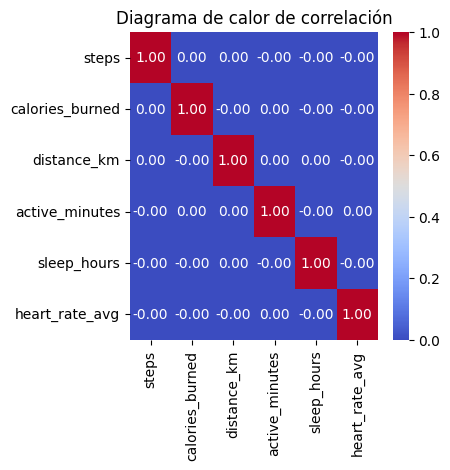

In [279]:
# Crear el diagrama de calor usando seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Diagrama de calor de correlación')
plt.show()

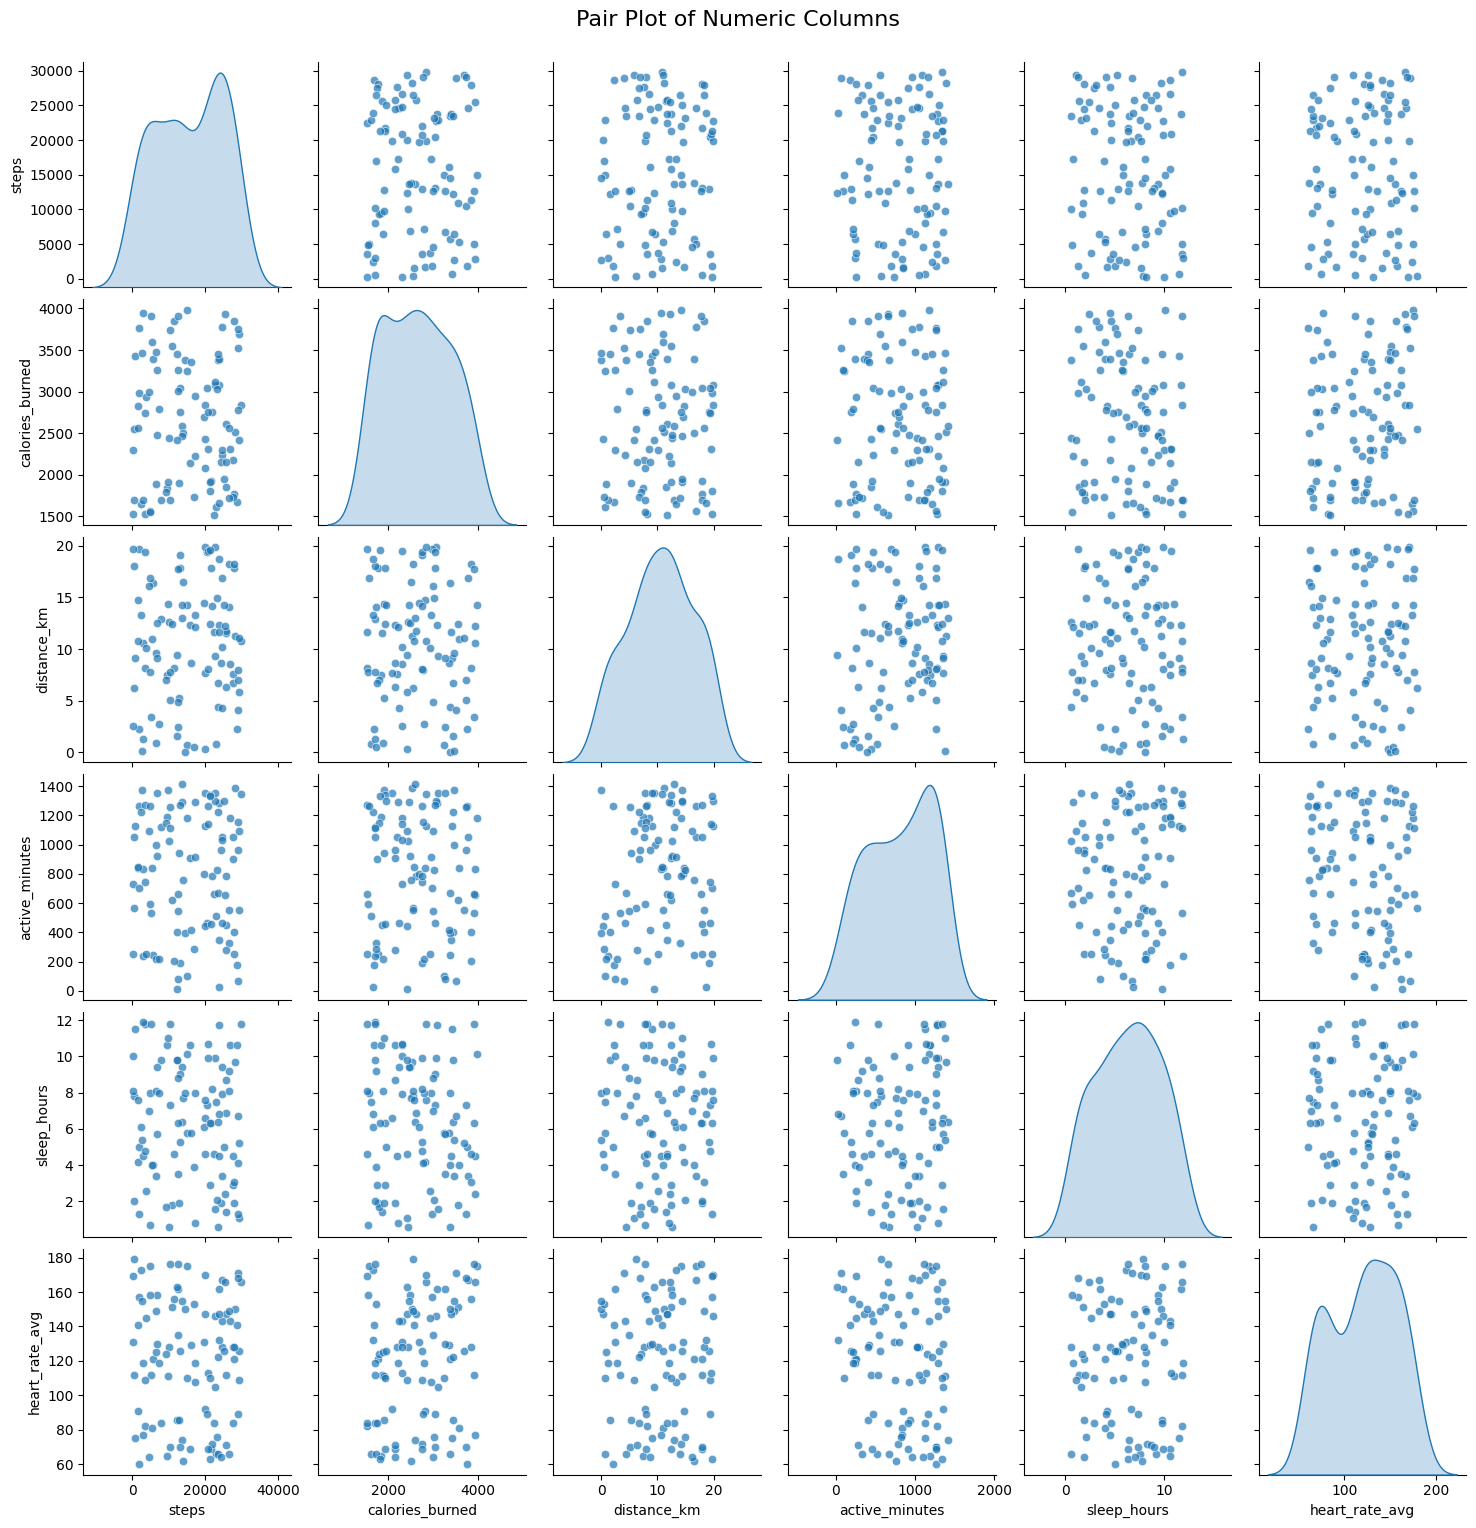

In [280]:
# Pair plot for numeric columns
sample_df = df.sample(frac=0.0001, random_state=42)
sns.pairplot(sample_df[variables_numericas], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pair Plot of Numeric Columns", y=1.02, fontsize=16)
plt.show()

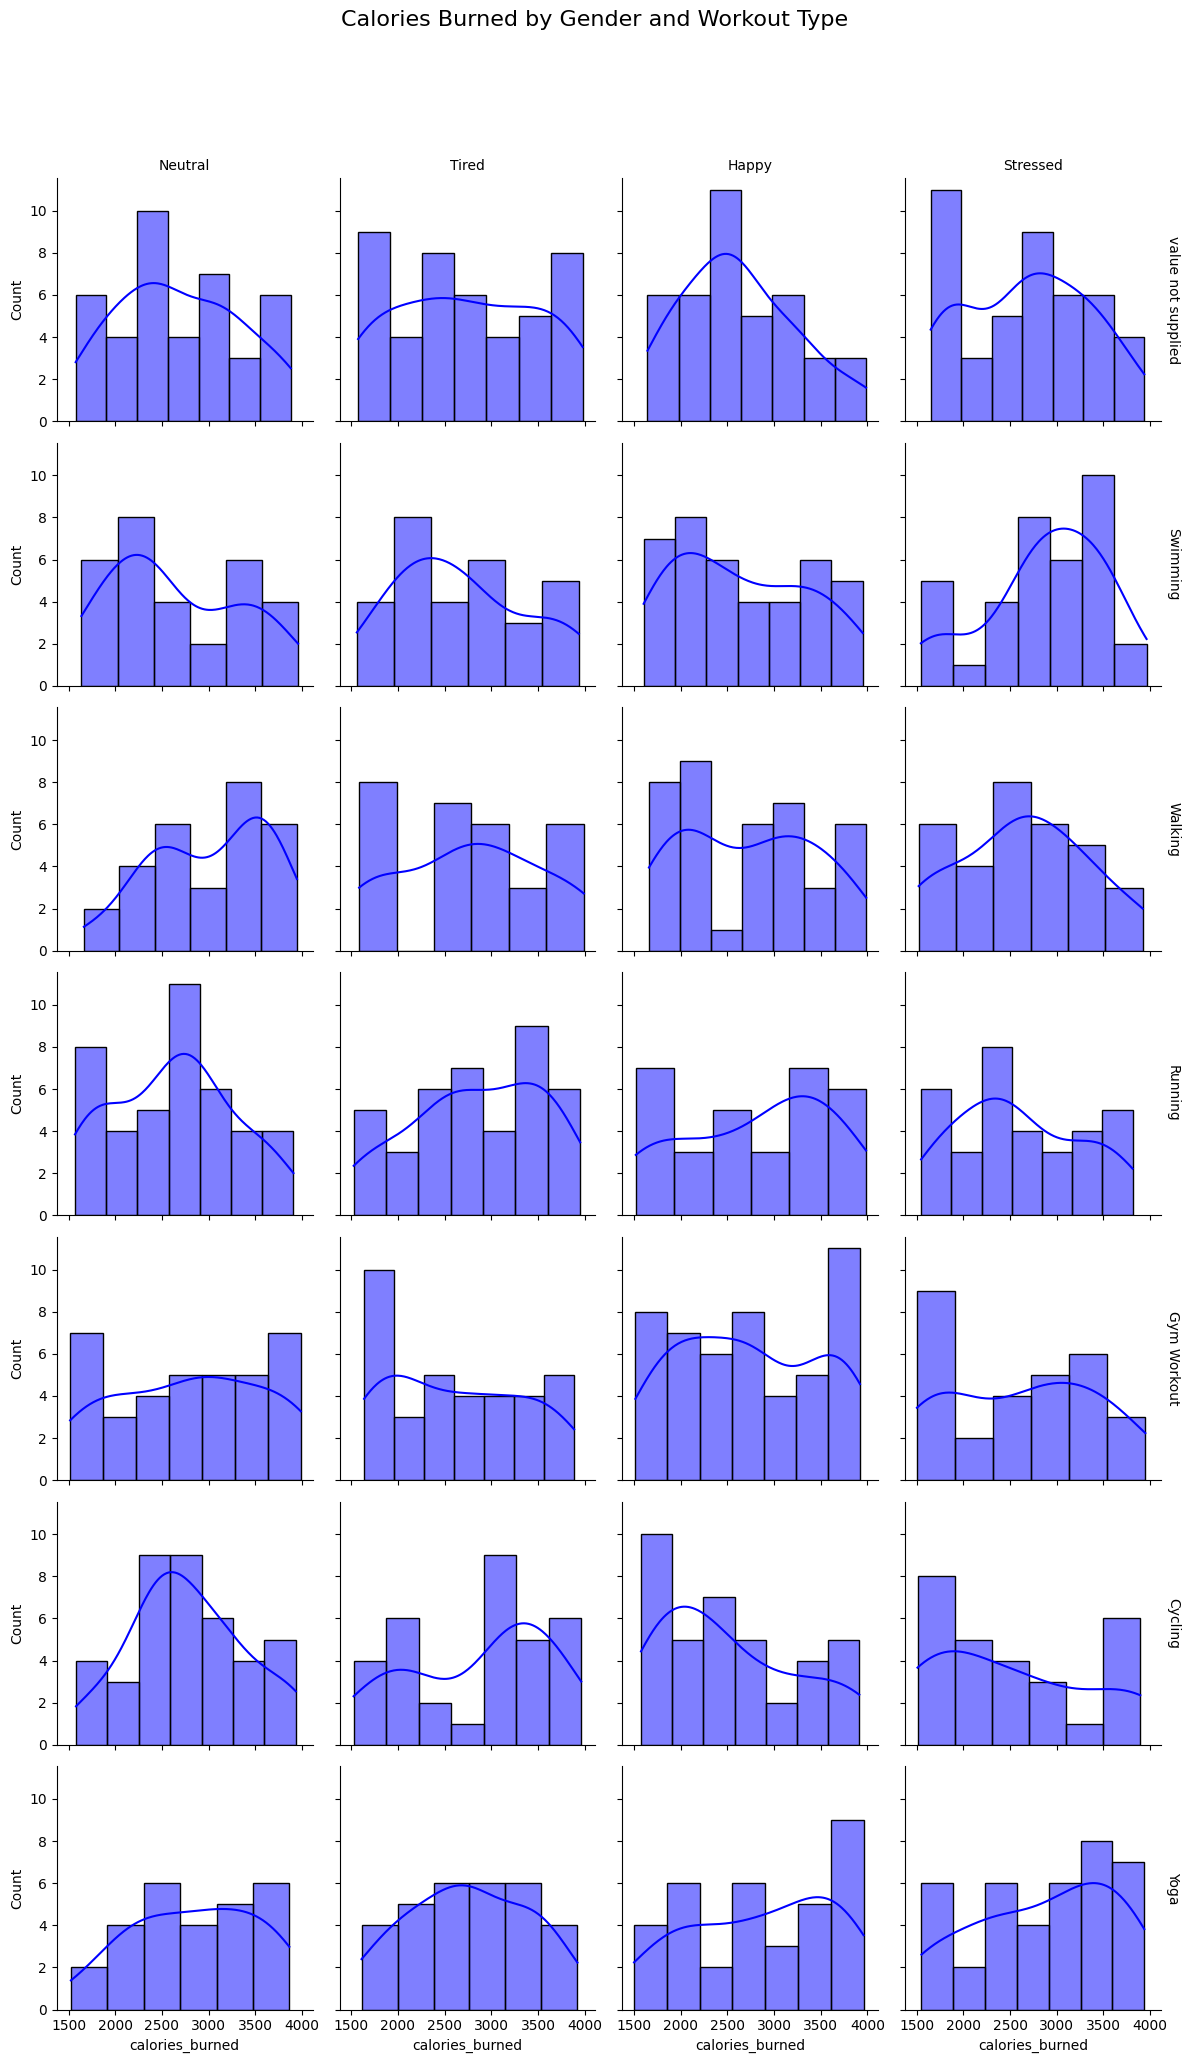

In [281]:
sample_df = df.sample(frac=0.001, random_state=42)
g = sns.FacetGrid(sample_df, col='mood', row='workout_type', margin_titles=True, height=3)
g.map(sns.histplot, 'calories_burned', kde=True, color='blue')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Calories Burned by Gender and Workout Type", fontsize=16)
plt.show()

## Correlación de variables Ordinales y conversión Ordinales a numéricas

In [282]:
from scipy.stats import chi2_contingency

# 1. Seleccionar variables categóricas
categorical_cols = ['workout_type', 'weather_conditions', 'mood', 'location']
df_categorical = df[categorical_cols]

# 2. Definir una función para la prueba de Chi-Cuadrado
def check_chi2_dependency(df, col1, col2, alpha=0.05):
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(df[col1], df[col2])

    # Aplicar la prueba de Chi-Cuadrado
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Interpretar el p-value
    result = "Dependencia (Correlación)" if p_value < alpha else "Independencia (No Correlación)"

    return f"Relación entre {col1} y {col2}: P-value = {p_value:.3f} -> {result}"

print("\n--- Pruebas de Dependencia (Chi-Cuadrado) ---\n")

# 3. Realizar pruebas entre pares clave (P-value < 0.05 indica dependencia)
# - ¿El tipo de entrenamiento depende del clima?
print(check_chi2_dependency(df, 'workout_type', 'weather_conditions'))

# - ¿El estado de ánimo depende del tipo de entrenamiento?
print(check_chi2_dependency(df, 'mood', 'workout_type'))

# - ¿El lugar de entrenamiento depende del clima?
print(check_chi2_dependency(df, 'location', 'weather_conditions'))


--- Pruebas de Dependencia (Chi-Cuadrado) ---

Relación entre workout_type y weather_conditions: P-value = 0.966 -> Independencia (No Correlación)
Relación entre mood y workout_type: P-value = 0.164 -> Independencia (No Correlación)
Relación entre location y weather_conditions: P-value = 0.982 -> Independencia (No Correlación)


Se utiliza la técnica Ordinal Encoder para convertir los datos categóricos a numéricos.

In [283]:
from sklearn.preprocessing import OrdinalEncoder
# Identificar variables categóricas
cat_cols = ['workout_type', 'weather_conditions', 'location', 'mood']

ordinal_encoder = OrdinalEncoder()
df[cat_cols] = ordinal_encoder.fit_transform(df[cat_cols])

print("--- DataFrame Codificado ---")
print(df)
print("\n" + "="*50 + "\n")

# 3. Acceder al atributo .categories_ para crear el Mapeo
print("--- Mapeo de Códigos Numéricos a Categorías ---")

# .categories_ es una lista de arrays, uno por columna
categories_list = ordinal_encoder.categories_

# Crear y mostrar el mapeo para cada columna
for i, col in enumerate(cat_cols):
    categories = categories_list[i]
    print(f"\nColumna: {col}")

    # El mapeo: el índice (0, 1, 2...) es el código numérico.
    mapping_dict = {
        code: cat
        for code, cat in enumerate(categories)
    }
    print(f"Códigos: {mapping_dict}")

--- DataFrame Codificado ---
         user_id        date    steps  calories_burned  distance_km  \
0          468.0   1/01/2023   4530.0          2543.02        16.10   
1          879.0   1/01/2023  11613.0          1720.76         8.10   
2          152.0   1/01/2023  27335.0          1706.35         3.57   
3          311.0   1/01/2023  13459.0          2912.38         6.41   
4          759.0   1/01/2023  15378.0          3344.51        17.88   
...          ...         ...      ...              ...          ...   
2730688    294.0  26/09/2025  21883.0          1711.42         4.62   
2730689    114.0  26/09/2025  15451.0          3961.63         1.93   
2730690     85.0  26/09/2025  17912.0          3604.77         5.81   
2730691    109.0  26/09/2025  10072.0          2724.34         7.42   
2730692    893.0  26/09/2025  29516.0          3713.99         6.70   

         active_minutes  sleep_hours  heart_rate_avg  workout_type  \
0                 613.0          1.5           1

In [284]:
correlation_spearman = df[cat_cols ].corr(method='spearman')
correlation_spearman


workout_type  weather_conditions  location      mood
workout_type            1.000000           -0.001053  0.000255  0.001158
weather_conditions     -0.001053            1.000000  0.000091 -0.000296
location                0.000255            0.000091  1.000000  0.000653
mood                    0.001158           -0.000296  0.000653  1.000000

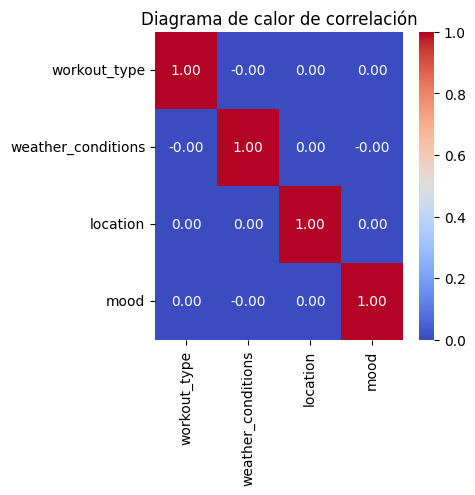

In [285]:
# Crear el diagrama de calor usando seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Diagrama de calor de correlación')
plt.show()

Tanto para las variables numéricas como categóricas a simple vista no se ve una relación directa entre las variables, apreciandose ausencia de correlación.